In [1]:
from numpy import *

- The smaller the mean squared error: $ MSE = \frac{1}{N} \sum( y_{i} - y_{p} )^2 $, the closer we are to find the best fitted line.

- We will evaluate our model by calculating R-squared value : $ R^2 =  \frac {\sum( y_{p} - \hat y )^2} {\sum( y - \hat y )^2} $. Since R-squared value closed to 1 determines a model is good and R-squared value closed to 0 determines a model is useless. So, a higher R-squared value(closed to 1) is desirable.

In [2]:
# calculating mean squared error
def mean_squared_error(b, m):
    return 1/len(x) * sum((y - (m * x + b))**2)

In [3]:
# calculating R-squared value
def r_squared_value(y_pred):
    return sum((y_pred - (sum(y)/len(y)))**2) / sum((y - ((sum(y)/len(y))))**2)

## Gradient Descent
we use gradient descent to minimize the value of our cost function. Here, our cost funtion is mean square error (MSE). 
Gradient descent algorithm says, repeat untill convergence{
$$ b' = \sum \frac{-2}{N} * (y - (mx + b))  $$
$$ m' = \sum \frac{-2}{N} * x * (y - (mx + b))  $$
simulteniously update y-intercept b and slope m,
$$ b = b - α*b' $$
$$ m = m - α*m' $$
}

In [4]:
# reading data points from file
points = genfromtxt("Datasets/data.csv", delimiter=",")
# declaring independent and dependent variable x and y
x, y = points[:, 0], points[:, 1]

# initializing learning rate, y-intercept b, slope m, number of iterations
learning_rate, initial_b, initial_m, num_iterations, N = .0001, 0, 0, 1000, len(x)
    
# printing mean squared error for initial y-intercept and slope
print(f'b = {initial_b}, m = {initial_m}, mse = {mean_squared_error(initial_b, initial_m)}')

print('Applying Gradient Descent...')

# gradient descent algorithm
for i in range(num_iterations):
    # calculating the derivative of loss function with respect to y-intercept b
    b_gradient = sum(-(2/N) * (y - ((initial_m * x) + initial_b)))
    # calculating the derivative of loss function with respect to slope m
    m_gradient = sum(-(2/N) * x * (y - ((initial_m * x) + initial_b)))
    # updating y-intercept and slope simulteniously
    initial_b = initial_b - (learning_rate * b_gradient)
    initial_m = initial_m - (learning_rate * m_gradient)

# y-intercept and slope after hopefully end up at minima
b, m = initial_b, initial_m

# printing mean squared error for final y-intercept and slope
print(f'b = {initial_b}, m = {initial_m}, mse = {mean_squared_error(initial_b, initial_m)}')

b = 0, m = 0, mse = 5565.107834483214
Applying Gradient Descent...
b = 0.08893651993741349, m = 1.4777440851894448, mse = 112.6148101161347


In [10]:
x

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67

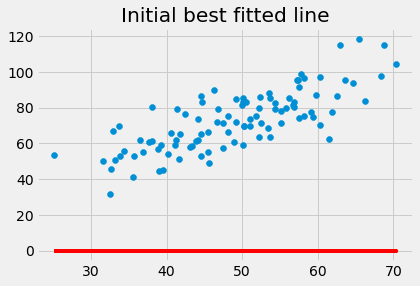

In [5]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# visualizing data points and best fitted line for initial y-intercept and slope
plt.scatter(x, y)
plt.plot(x, [0*item + 0 for item in x], color = 'red')
plt.title('Initial best fitted line')
plt.show()

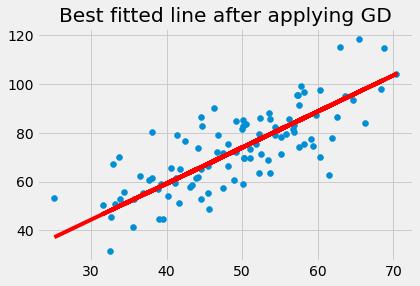

In [6]:
# visualizing data points and best fitted line for final y-intercept and slope found by applying gradient descent
plt.scatter(x, y)
plt.plot(x, [m*item + b for item in x], color = 'red')
plt.title('Best fitted line after applying GD')
plt.show()

In [7]:
# calculating R-squared value to evaluate our model
y_pred = array([m*item + b for item in x])
print(f'R-squared value: {r_squared_value(y_pred)}')

R-squared value: 0.7478553768822105
